# Laboratorio 3 - Aprendizaje profundo CNN

In [5]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

## Preparación de datos

In [6]:
# Diccionario de labels
labels = [
    "Limite velocidad (20km/h)",
    "Limite velocidad (30km/h)",
    "Limite velocidad (50km/h)",
    "Limite velocidad (60km/h)",
    "Limite velocidad (70km/h)",
    "Limite velocidad (80km/h)",
    "Fin de limite velocidad (80km/h)",
    "Limite velocidad (100km/h)",
    "Limite velocidad (120km/h)",
    "No rebasar",
    "No rebasar para vehículos mayores de 3.5 toneladas métricas",
    "Derecho-de-vía en la siguiente intersección",
    "Camino prioritario",
    "Ceda el paso",
    "Alto",
    "No vehículos",
    "Prohibido vehículos mayores de 3.5 toneladas métricas",
    "No hay entrada",
    "Precaución general",
    "Curva peligrosa a la izquierda",
    "Curva peligrosa a la derecha",
    "Doble curva",
    "Camino disparejo",
    "Camino resbaloso",
    "Camino se reduce a la derecha",
    "Trabajos adelante",
    "Señales de Tráfico -semáforos-",
    "Cruce de peatones",
    "Cruce de Niños",
    "Cruce de bicicletas",
    "Cuidado hielo/nieve",
    "Cruce de animales silvestres",
    "Fin de todos los limites de velocidad y rebase",
    "Gire a la derecha adelante",
    "Gire a la izquierda adelante",
    "Recto solo",
    "Vaya recto o a la derecha",
    "Vaya recto o a la izquierda",
    "Manténgase a la derecha",
    "Manténgase a la izquierda",
    "Vuelta en U obligada",
    "Fin de no rebasar",
    "Fin de no rebasar para vehículos mayores de 3.5 toneladas métricas"
]

In [7]:
with open('datos\entrenamiento.p', 'rb') as file:
    train_data = pickle.load(file)
    
with open('datos\prueba.p', 'rb') as file:
    test_data = pickle.load(file)

with open('datos\\validacion.p', 'rb') as file:
    validation_data = pickle.load(file)


In [8]:
print(train_data.keys())
train_data['features'].shape

dict_keys(['coords', 'labels', 'features', 'sizes'])


(34799, 32, 32, 3)

**Imprimir imagen de ejemplo**

Label: 36  -  Vaya recto o a la derecha


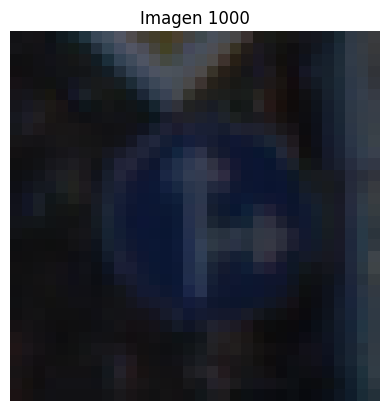

In [9]:
# Suponiendo que 'features' es un array 4D con dimensiones (num_images, height, width, channels)
n = 1000  # Número de la imagen que deseas visualizar (por ejemplo, la imagen número 5)

print("Label:", train_data['labels'][n], " - ", labels[train_data['labels'][n]])

# Extraer la imagen específica
image_to_display = train_data['features'][n]

# Mostrar la imagen
plt.imshow(image_to_display)
plt.title(f'Imagen {n}')
plt.axis('off')  # Opcional: para ocultar los ejes
plt.show()


### Procesamiento de imagenes

#### Redimensionar a tamaño promedio

In [10]:
print(train_data['features'].shape)
print(test_data['features'].shape)
print(validation_data['features'].shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


Todas las imagenes tienen las mismas dimensiones por lo que no es necesario redimensionar

#### Normalizar imágenes

In [11]:
def normalize_images(images):
    # Convertir los valores a float y normalizar dividiendo por 255
    images = images.astype(np.float32) / 255.0
    return images

In [12]:
train_data['features'] = normalize_images(train_data['features'])
test_data['features'] = normalize_images(test_data['features'])
validation_data['features'] = normalize_images(validation_data['features'])

In [13]:
# Verificar que los datos estén normalizados (rango de 0 a 1)
print(train_data['features'].min(), train_data['features'].max())
print(test_data['features'].min(), test_data['features'].max())
print(validation_data['features'].min(), validation_data['features'].max())

0.0 1.0
0.0 1.0
0.0 1.0


### Construcción del modelo

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [25]:
modelo = Sequential()

forma_imagen = train_data['features'][0].shape

modelo.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=forma_imagen, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))

modelo.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))

modelo.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))

modelo.add(Flatten())

modelo.add(Dense(128, activation='relu'))

modelo.add(Dropout(0.5))

# Ajuste para multiclase con softmax
num_clases = len(labels)
modelo.add(Dense(num_clases))
modelo.add(Activation('softmax'))

modelo.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

d:\diego\OneDrive - UVG\Documentos Universidad\Semestre 8\data science\labs\ds-entorno\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
modelo.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 43)             │         5,547 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 43)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,763 (370.17 KB)

 Trainable params: 94,763 (370.17 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento de modelo

#### Codificar labels

In [21]:
from tensorflow.keras.utils import to_categorical

In [23]:
# Convertir las etiquetas a one-hot encoding
num_clases = len(labels)
train_labels = to_categorical(train_data['labels'], num_clases)
validation_labels = to_categorical(validation_data['labels'], num_clases)
test_labels = to_categorical(test_data['labels'], num_clases)

#### Early Stoping

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [28]:
history = modelo.fit(
    train_data['features'],
    train_labels, 
    validation_data=(validation_data['features'], validation_labels),
    epochs=3,
    batch_size=16
)


Epoch 1/3
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 66s 30ms/step - accuracy: 0.3037 - loss: 2.4987 - val_accuracy: 0.7927 - val_loss: 0.6875
Epoch 2/3
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 54s 25ms/step - accuracy: 0.8469 - loss: 0.4793 - val_accuracy: 0.9224 - val_loss: 0.3231
Epoch 3/3
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 0.9314 - loss: 0.2198 - val_accuracy: 0.9401 - val_loss: 0.2163


### Evaluar el modelo


In [30]:
test_loss, test_acc = modelo.evaluate(test_data['features'], test_labels)
print(f'Precisión en el conjunto de prueba: {test_acc}')

395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9287 - loss: 0.3172
Precisión en el conjunto de prueba: 0.9286619424819946
